In [1]:
import cv2 as cv
import numpy as np
import os
import glob
# 資料夾路徑
folder_path = "/kaggle/input/2023-summer-nycu-dl-lab3/new_dataset/new_dataset/train"
# 存放處理後影像的列表
img_list = []
# 取得所有影像檔案路徑
image_files = glob.glob(os.path.join(folder_path, "*.bmp"))
# 迭代處理每個影像檔案
for image_file in image_files:
    # 讀取影像
    image = cv.imread(image_file)
    # 轉成灰階
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # 二值化處理
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
    # 根據二值化的遮罩來裁切影像
    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh == 0] = [255, 255, 255]
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))
    crop_img = image[mnx:mxx, mny:mxy, :]
    crop_img_r = cv.resize(crop_img, (224, 224))
    img_list.append(crop_img_r)

In [2]:
target_folder_path = "/kaggle/working/precossed_dataset/train"
os.makedirs(target_folder_path, exist_ok=True)
for i, image_file in enumerate(image_files):    
    file_name = os.path.basename(image_file)
    target_file_path = os.path.join(target_folder_path, file_name)
    cv.imwrite(target_file_path, cv.cvtColor(img_list[i], cv.COLOR_BGR2RGB))

In [3]:
folder_path = "/kaggle/input/2023-summer-nycu-dl-lab3/new_dataset/new_dataset/test"
# 存放處理後影像的列表
img_list = []
# 取得所有影像檔案路徑
image_files = glob.glob(os.path.join(folder_path, "*.bmp"))
# 迭代處理每個影像檔案
for image_file in image_files:
    # 讀取影像
    image = cv.imread(image_file)
    # 轉成灰階
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # 二值化處理
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
    # 根據二值化的遮罩來裁切影像
    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh == 0] = [255, 255, 255]
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))
    crop_img = image[mnx:mxx, mny:mxy, :]
    crop_img_r = cv.resize(crop_img, (224, 224))
    img_list.append(crop_img_r)

In [4]:
target_folder_path = "/kaggle/working/precossed_dataset/test"
os.makedirs(target_folder_path, exist_ok=True)
for i, image_file in enumerate(image_files):    
    file_name = os.path.basename(image_file)
    target_file_path = os.path.join(target_folder_path, file_name)
    cv.imwrite(target_file_path, cv.cvtColor(img_list[i], cv.COLOR_BGR2RGB))

In [1]:
import cv2 as cv
import numpy as np
import os
import glob
# 資料夾路徑
folder_path = "/kaggle/input/2023-summer-nycu-dl-lab3/new_dataset/new_dataset/valid"
# 存放處理後影像的列表
img_list = []
# 取得所有影像檔案路徑
image_files = glob.glob(os.path.join(folder_path, "*.bmp"))
# 迭代處理每個影像檔案
for image_file in image_files:
    # 讀取影像
    image = cv.imread(image_file)
    # 轉成灰階
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # 二值化處理
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
    # 根據二值化的遮罩來裁切影像
    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh == 0] = [255, 255, 255]
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))
    crop_img = image[mnx:mxx, mny:mxy, :]
    crop_img_r = cv.resize(crop_img, (224, 224))
    img_list.append(crop_img_r)

In [2]:
target_folder_path = "/kaggle/working/precossed_dataset/valid"
os.makedirs(target_folder_path, exist_ok=True)
for i, image_file in enumerate(image_files):    
    file_name = os.path.basename(image_file)
    target_file_path = os.path.join(target_folder_path, file_name)
    cv.imwrite(target_file_path, cv.cvtColor(img_list[i], cv.COLOR_BGR2RGB))

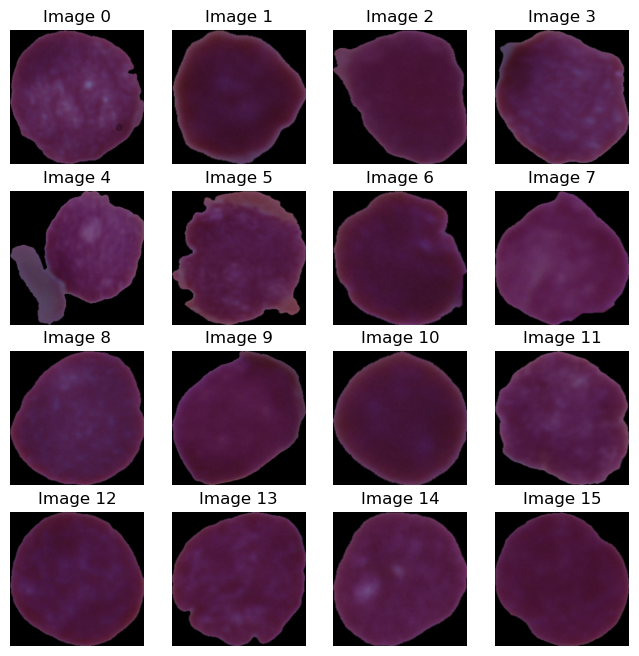

In [3]:
import matplotlib.pyplot as plt
start_index = 0
end_index = 15
# 繪製16張圖片
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i in range(start_index, end_index + 1):
    row = (i - start_index) // 4
    col = (i - start_index) % 4
    axs[row, col].imshow((img_list[i]))
    axs[row, col].axis('off')
    axs[row, col].set_title(f"Image {i}")
plt.show()